In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Retrieve the data
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# Descriptive statistics
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
pd.crosstab(index=mpg['origin'], columns='count')

col_0,count
origin,
europe,70
japan,79
usa,249


In [5]:
pd.crosstab(index=mpg['origin'], columns=mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [6]:
# Descriptive statistics by group
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


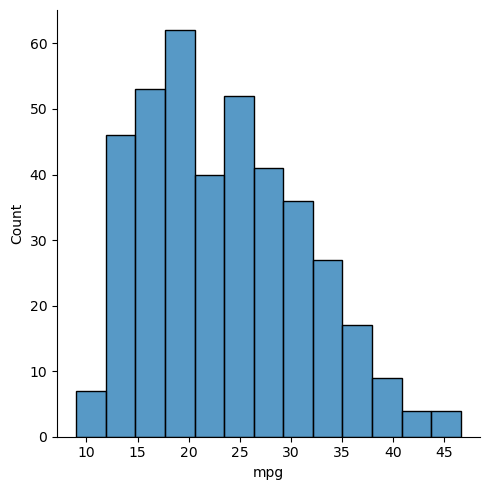

In [7]:
# Histogram of mpg
sns.displot(data=mpg, x='mpg')
plt.savefig('aina_1301.png', dpi=300)

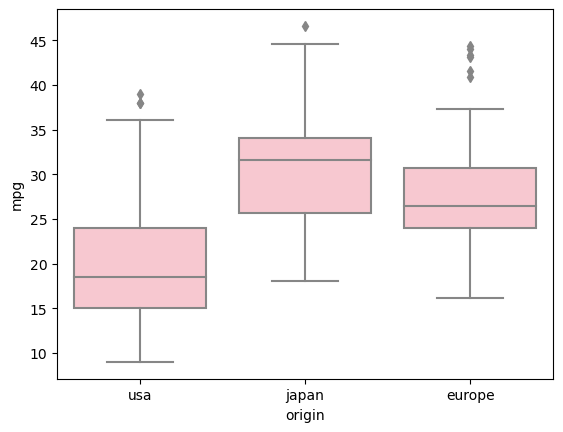

In [8]:
# Box plot of mpg by origin
sns.boxplot(x='origin', y='mpg', data=mpg, color='pink')
plt.savefig('aina_1302.png', dpi=300)

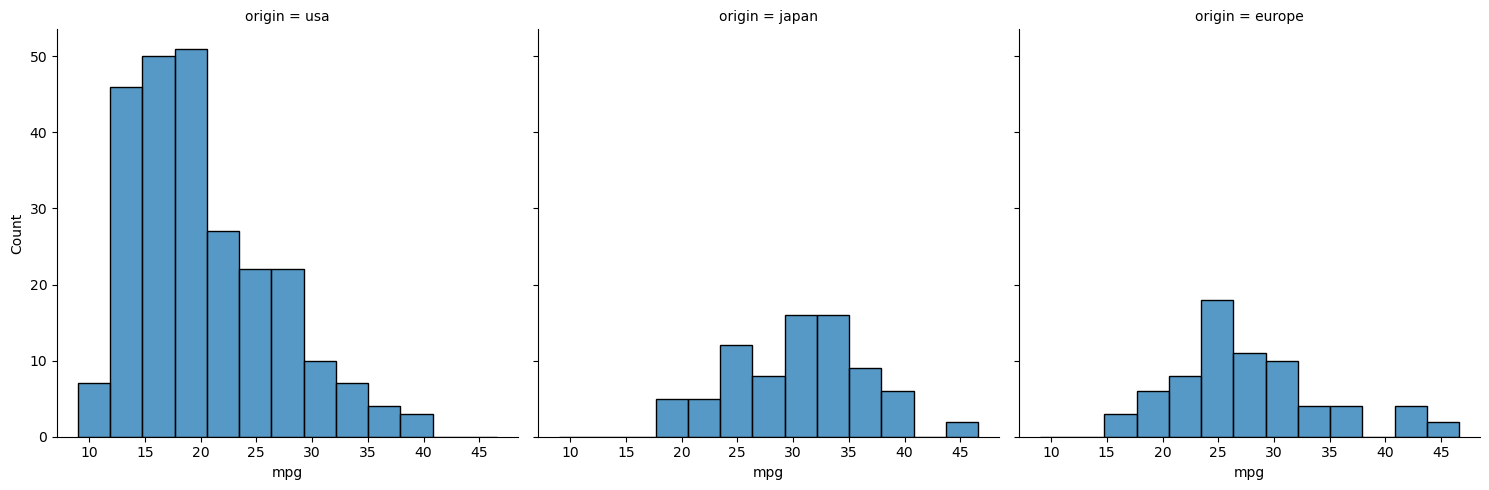

In [9]:
sns.displot(data=mpg, x="mpg", col="origin")
plt.savefig('aina_1303.png', dpi=300)

In [10]:
usa_cars = mpg[mpg['origin']=='USA']
europe_cars = mpg[mpg['origin']=='Europe']

In [11]:
stats.ttest_ind(usa_cars['mpg'], europe_cars['mpg'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [12]:
mpg[['mpg','horsepower','weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.831741
horsepower,-0.778427,1.000000,0.864538
weight,-0.831741,0.864538,1.000000


Text(0.5, 1.0, 'Relationship between weight and mileage')

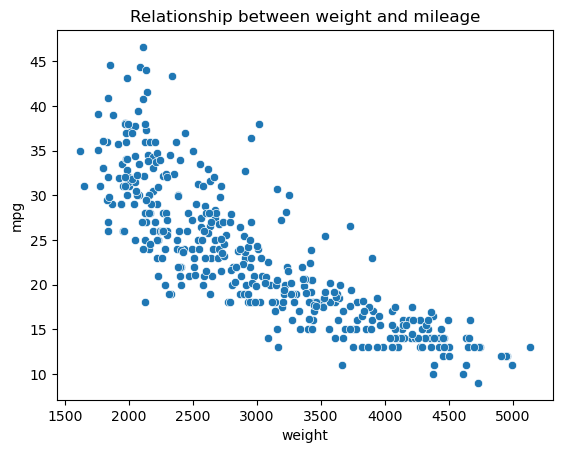

In [13]:
# Scatterplot of weight and mpg, add a label
sns.scatterplot(x='weight', y='mpg', data=mpg)
plt.title('Relationship between weight and mileage')

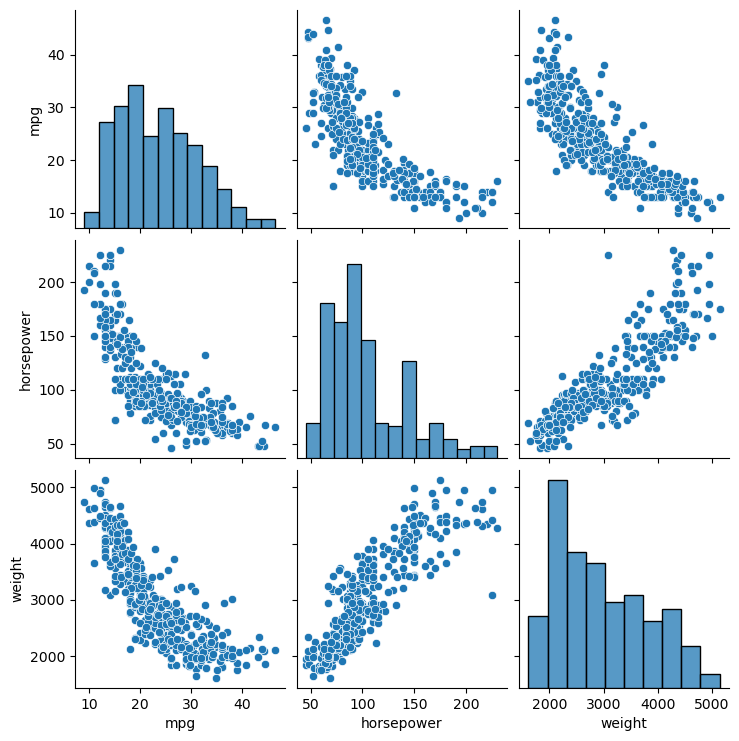

In [14]:
sns.pairplot(mpg[['mpg','horsepower','weight']])

In [15]:
# Linear regression of weight on mpg
stats.linregress(x=mpg['weight'], y=mpg['mpg'])

LinregressResult(slope=-0.007676610063926467, intercept=46.31736442026563, rvalue=-0.8317409332443352, pvalue=2.9727995640493384e-103, stderr=0.0002574868628078228, intercept_stderr=0.7952452295111817)

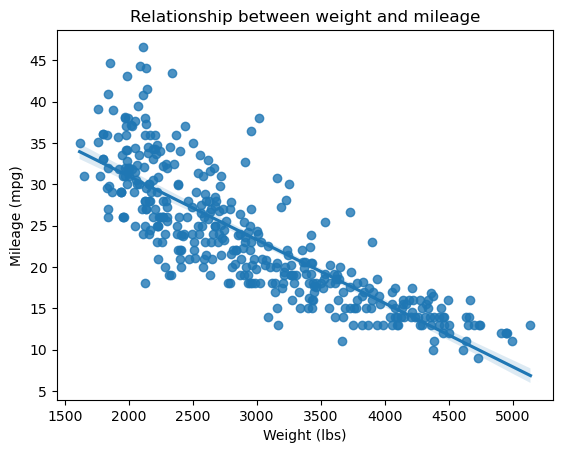

In [16]:
sns.regplot(x="weight", y="mpg", data=mpg)
plt.xlabel('Weight (lbs)')
plt.ylabel('Mileage (mpg)')
plt.title('Relationship between weight and mileage')

plt.savefig('aina_1306.png', dpi=300)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(mpg[['weight']], mpg[['mpg']], random_state=1234)

In [18]:
y_train.shape

(298, 1)

In [19]:
y_test.shape

(100, 1)

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Print first five observations 
y_pred[:5]

array([[14.3052485 ],
       [ 6.63716158],
       [16.28059746],
       [29.08148089],
       [27.05169318]])

In [21]:
# Get the training model coefficients
regr.coef_

array([[-0.00777696]])

In [22]:
metrics.r2_score(y_test, y_pred)

0.7391923827348639

In [23]:
metrics.mean_squared_error(y_test, y_pred)

15.857852951619911